In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [99]:
from sklearn.preprocessing import LabelBinarizer


In [113]:
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers import Flatten, Dense, Dropout, Activation, Conv2D, MaxPool2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam


In [3]:
train = pd.read_csv('/Users/DRMair/Downloads/archive/sign_mnist_train.csv')
test = pd.read_csv('/Users/DRMair/Downloads/archive/sign_mnist_test.csv')

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
train_x = train.iloc[0:27455,1:785].to_numpy()
train_y = train.iloc[0:27455,0:1].to_numpy()
test_x = test.iloc[0:7172,1:785].to_numpy()
test_y = test.iloc[0:7172,0:1].to_numpy()
print('Shape of train_x is {}.'.format(train_x.shape))
print('Shape of train_y is {}.'.format(train_y.shape))
print('Shape of test_x is {}.'.format(test_x.shape))
print('Shape of test_y is {}.'.format(test_y.shape))


Shape of train_x is (27455, 784).
Shape of train_y is (27455, 1).
Shape of test_x is (7172, 784).
Shape of test_y is (7172, 1).


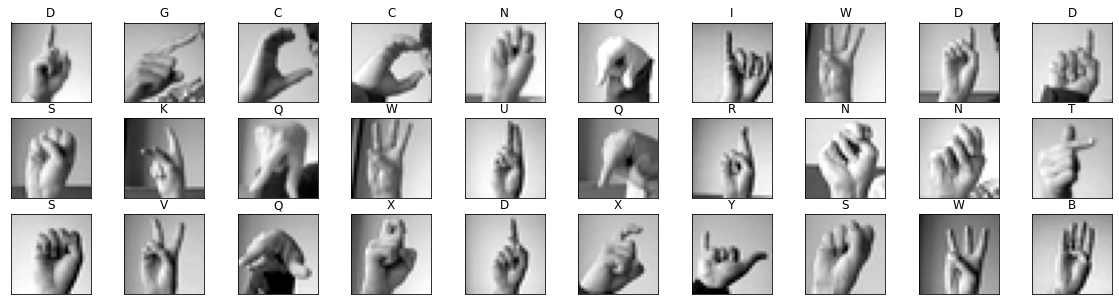

In [14]:
# Store labels of dataset
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# plot pictures
fig = plt.figure(figsize=(20,5))
for i in range(0, 30):
    # reshape pixels
    pixels = train_x[i] 
    pixels = np.array(pixels, dtype='uint8').reshape((28,28))
    # plot
    ax = fig.add_subplot(3,10, i + 1, xticks=[], yticks=[])
    ax.imshow(pixels, cmap='gray')
    label = labels[train_y[i][0]]
    ax.set_title("{}".format(label))
plt.show()
    

In [75]:
# just code to get the number of classes in the train/test data set
getclassnum = train_y.tolist()
classes_list = []
for i in getclassnum:
    classes_list.append(i[0])
classes_list
num_classes = set(classes_list)

/Users/DRMair/anaconda3/envs/tf_2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

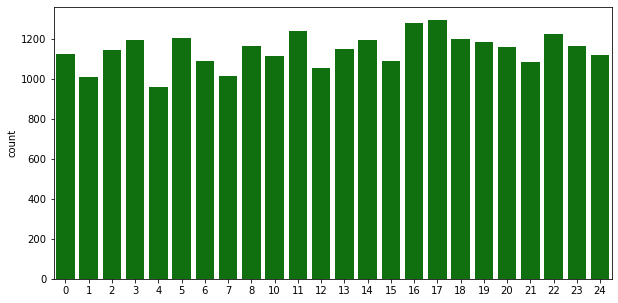

In [90]:
#Count plot to show freauency of different labels

plt.figure(figsize=(10,5))
sns.countplot(train['label'].values, color = 'green')

Lets take a look at the data set a examine how many of each label is found. 

In [18]:
train['label'].value_counts().unique

<bound method Series.unique of 17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64>

In [109]:
#Label Encoding 

label_binrizer = LabelBinarizer()
one_hot_train_y = label_binrizer.fit_transform(train_y)
one_hot_test_y = label_binrizer.fit_transform(test_y)

print(one_hot_train_y.shape)
print(one_hot_test_y.shape)

(27455, 24)
(7172, 24)


In [101]:
# Use keras to make a one hot encoding

train_y_OH = tf.keras.utils.to_categorical(train_y, num_classes=25)
test_y_OH = tf.keras.utils.to_categorical(test_y, num_classes=25)
print(train_y_OH.shape)
print(test_y_OH.shape)

(27455, 25)
(7172, 25)


In [20]:
# reshape train and test set shapes, number of channels is 1 because images are greyscale (3 channels of RBG images)
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

# divide by 255 to normalize pixel data on train and test

train_x = train_x/255
test_x = test_x/255

In [120]:
print(train_x.shape)
print(test_x.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


## Design the CNN to Process These Images

In [149]:
model = Sequential()

# 1st layer 
model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1)))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd layer
model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# fully connected layer

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(25))

model.add(Activation('softmax'))


In [150]:
# we now compile the model using the adam optimizer
# we use the accuracy metrics option to better have a better metric for checking the accuracy of the model
# categorical_crossentropy is used because we have mulitple classes 

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) 

The next cell consists of some tensorflow code for data augmentation. Data augmentation methods are used to increase the relevant data in your set. When classifying objects in the real world there will never be the 'perfect image' that looks exactly like one from the data set. Data augmentation helps recitify this.

In [151]:

gen_1 = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [152]:
train_generator = gen_1.flow(train_x, train_y_OH, batch_size=64)
test_generator = test_gen.flow(test_x, test_y_OH, batch_size=64)

In [153]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_19 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_20 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 32)      

In [155]:
# time to train the model

model_training_info = model.fit_generator(train_generator, steps_per_epoch=27455//64, epochs=5, validation_data=test_generator, validation_steps=7172//64)


Epoch 1/5
428/428 [==============================] - 267s 625ms/step - loss: 0.3972 - accuracy: 0.8864 - val_loss: 1.8988 - val_accuracy: 0.4528
Epoch 2/5
428/428 [==============================] - 283s 660ms/step - loss: 0.0403 - accuracy: 0.9921 - val_loss: 0.4768 - val_accuracy: 0.8338
Epoch 3/5
428/428 [==============================] - 271s 633ms/step - loss: 0.0224 - accuracy: 0.9948 - val_loss: 0.4174 - val_accuracy: 0.8593
Epoch 4/5
428/428 [==============================] - 272s 635ms/step - loss: 0.0176 - accuracy: 0.9959 - val_loss: 0.4584 - val_accuracy: 0.8198
Epoch 5/5
428/428 [==============================] - 272s 636ms/step - loss: 0.0135 - accuracy: 0.9969 - val_loss: 0.0760 - val_accuracy: 0.9889


Now that we have trained the model and gotten good results lets do the final measures for accuracy.

In [156]:
score_model = model.evaluate(test_x, test_y_OH)
print('Test accuracy: ', score_model[1])

7172/7172 [==============================] - 43s 6ms/step
Test accuracy:  0.9885666370391846


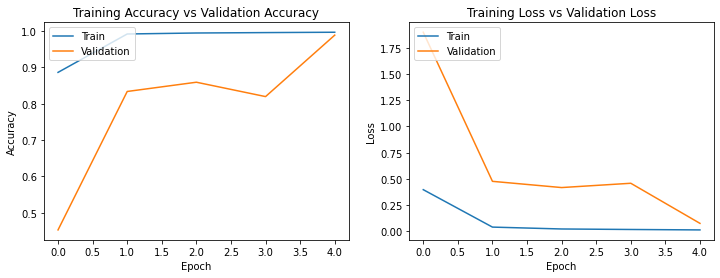

In [157]:

fig , ax = plt.subplots(1,2)
train_acc = model_training_info.history['accuracy']
train_loss = model_training_info.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(model_training_info.history['accuracy'])
ax[0].plot(model_training_info.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(model_training_info.history['loss'])
ax[1].plot(model_training_info.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

Lets try a different model architecture to see if the accuracy will improve at all.

In [128]:
model2 = Sequential()

model2.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model2.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model2.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model2.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model2.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model2.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model2.add(Flatten())

model2.add(Dense(512, kernel_initializer="he_normal", activation = 'relu'))

model2.add(Dropout(0.2))

model2.add(Dense(24, activation = 'softmax'))


In [129]:
model2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) 
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)              

In [130]:
# a different values for the imagedatagenerator function 

gen = ImageDataGenerator(rotation_range= 40 , width_shift_range=0.2, shear_range=0.2,
                         height_shift_range=0.2, zoom_range=0.2, horizontal_flip = True, 
                             fill_mode='nearest')

test_gen = ImageDataGenerator()

In [131]:
# start here, training the model


train_generator = gen.flow(train_x, one_hot_train_y, batch_size=64)
test_generator = test_gen.flow(test_x, one_hot_test_y, batch_size=64)

model2_training_info = model2.fit_generator(train_generator, steps_per_epoch = len(train_x)//64, 
                                            epochs = 15, validation_data = test_generator, 
                                            validation_steps = len(test_x)//64)


Epoch 1/15
428/428 [==============================] - 125s 291ms/step - loss: 2.8738 - accuracy: 0.1277 - val_loss: 2.4784 - val_accuracy: 0.2306
Epoch 2/15
428/428 [==============================] - 113s 265ms/step - loss: 2.1488 - accuracy: 0.3128 - val_loss: 1.5637 - val_accuracy: 0.5295
Epoch 3/15
428/428 [==============================] - 114s 266ms/step - loss: 1.6734 - accuracy: 0.4505 - val_loss: 0.9251 - val_accuracy: 0.6396
Epoch 4/15
428/428 [==============================] - 115s 268ms/step - loss: 1.3756 - accuracy: 0.5379 - val_loss: 0.7554 - val_accuracy: 0.7032
Epoch 5/15
428/428 [==============================] - 113s 264ms/step - loss: 1.1893 - accuracy: 0.6006 - val_loss: 0.5680 - val_accuracy: 0.7558
Epoch 6/15
428/428 [==============================] - 112s 263ms/step - loss: 1.0575 - accuracy: 0.6419 - val_loss: 0.5761 - val_accuracy: 0.8014
Epoch 7/15
428/428 [==============================] - 113s 263ms/step - loss: 0.9230 - accuracy: 0.6863 - val_loss: 0.5492 -

In [135]:
score_model2 = model2.evaluate(test_x, one_hot_test_y)
print('Test accuracy: ', score_model2[1])

7172/7172 [==============================] - 13s 2ms/step
Test accuracy:  0.8954266309738159


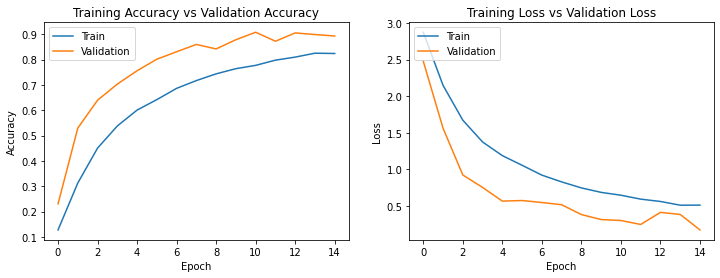

In [140]:
# model2

fig , ax = plt.subplots(1,2)
train_acc = model2_training_info.history['accuracy']
train_loss = model2_training_info.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(model2_training_info.history['accuracy'])
ax[0].plot(model2_training_info.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(model2_training_info.history['loss'])
ax[1].plot(model2_training_info.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
# Predict the values from the validation dataset
model2_pred = model2.predict(test_x)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(16, 12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap=sns.cubehelix_palette(8),fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()